In [ ]:
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions import Normal
import gymnasium as gym
import collections
import random
import matplotlib.pyplot as plt
import SAC_class_setting
import util
import replay_buffer as rb

In [ ]:
env_name = 'Hopper-v2'
env = gym.make(env_name)

In [7]:
actor_lr = 3e-4
critric_lr = 3e-4
alpha_lr = 3e-4
num_episodes = 2000
hidden_dim = 128
gamma = 0.99
tau = 0.005
buffer_size = 100000
minimal_size = 1000
batch_size = 64
hidden_layer_num = 1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [8]:
replay_buffer = 'ReplayBuffer'
agent = SAC_class_setting.SACContinuous(replay_buffer, buffer_size, env, hidden_dim, hidden_layer_num,
                                    actor_lr, critric_lr, alpha_lr, tau, gamma, device)

return_list = util.train_off_policy_agent(env, agent, num_episodes, minimal_size, batch_size)


Iteration 9: 100%|██████████| 200/200 [14:11<00:00,  4.26s/it, episode=2000, return=2494.609]


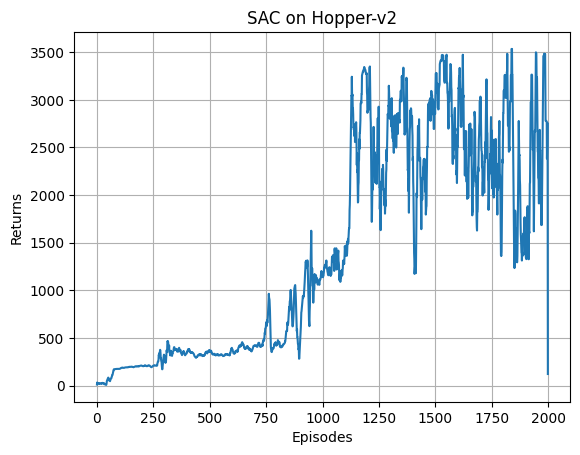

In [9]:
smooth_return = util.smooth_figure(return_list, 9)
episodes_list = list(range(len(return_list)))
plt.plot(episodes_list, smooth_return)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('SAC on {}'.format(env_name))
plt.grid()
plt.show()

In [15]:
replay_buffer = 'PrioritizedReplayBuffer'
per_agent = SAC_class_setting.SACContinuous(replay_buffer, buffer_size, env, hidden_dim, hidden_layer_num,
                                    actor_lr, critric_lr, alpha_lr, tau, gamma, device)

per_return_list = util.train_off_policy_agent(env, per_agent, num_episodes, minimal_size, batch_size)

Iteration 4:   4%|▍         | 9/200 [00:10<03:51,  1.21s/it]


KeyboardInterrupt: 

In [ ]:
per_smooth_return = util.smooth_figure(per_return_list, 9)
episodes_list = list(range(len(return_list)))
plt.plot(episodes_list, per_smooth_return)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('SAC on {}'.format(env_name))
plt.grid()
plt.show()